In [1]:
import networkx as nx

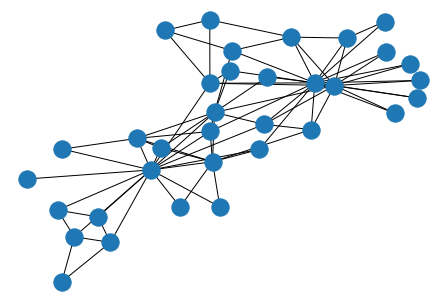

In [2]:
# Create a graph and visualize it
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
nx.draw(G)

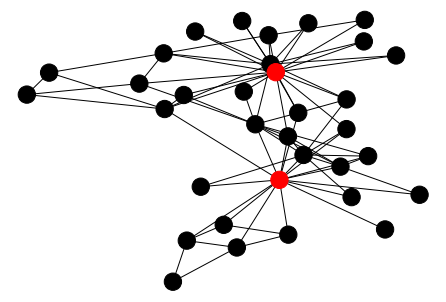

In [3]:
# Due to disagreements between instructor and administrator 
#   over the price of karate lessons, the club is splitting up.
# Let's try to predict how it will split with max-flow/min-cut.

s = 0                          # adminstrator
t = G.number_of_nodes() - 1    # instructor

node_colors = [ "red" if i in {s,t} else "black" for i in G.nodes]
nx.draw(G,node_color=node_colors)

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
# DG is directed version of G. Replaces each edge {i,j} by (i,j) and (j,i)
DG = nx.DiGraph(G)

# Suppose unit arc weights (capacities)
c = { (i,j) : 1 for (i,j) in DG.edges }

In [6]:
# Create model object
m = gp.Model()

# Create variable for each edge, indicating whether it is cut
y = m.addVars( DG.edges )

# Create variable for each node, indicating whether it is on s-side of cut
z = m.addVars( DG.nodes )

# Objective function: minimize (weight of) cut
m.setObjective( gp.quicksum( c[e]*y[e] for e in DG.edges ), GRB.MINIMIZE )

# Trivial constraints: s should be on same side as s, and t should not.
m.addConstr( z[s] == 1 )
m.addConstr( z[t] == 0 )

# Constraints: edge (i,j) is cut if (i is with s) and (j is not). 
m.addConstrs( y[i,j] >= z[i] - z[j] for i,j in DG.edges ) 

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 158 rows, 190 columns and 470 nonzeros
Model fingerprint: 0x01e91f78
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 38 rows and 39 columns
Presolve time: 0.02s
Presolved: 120 rows, 151 columns, 330 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.500000e+01   0.000000e+00      0s
      37    1.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 37 iterations and 0.06 seconds
Optimal objective  1.000000000e+01


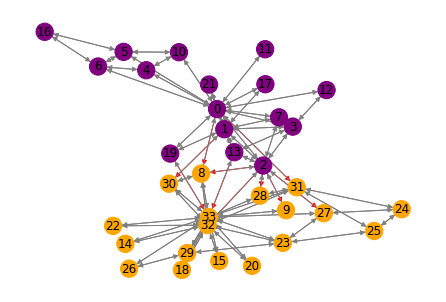

In [7]:
# Visualize the min-cut solution
cut_edges = [ e for e in DG.edges if y[e].x > 0.01 ]
S = [ i for i in DG.nodes if z[i].x > 0.5 ] # s-side of cut

edge_colors = [ "red" if i in cut_edges else "gray" for i in DG.edges ]
node_colors = [ "purple" if i in S else "orange" for i in DG.nodes ]

nx.draw( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )

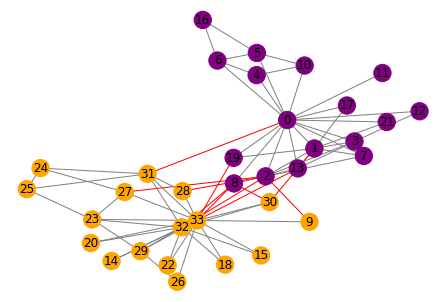

In [8]:
# Visualize the actual split
instructor_side = [ i for i in G.nodes if G.nodes[i]["club"] == 'Mr. Hi']

node_colors = [ "purple" if i in instructor_side else "orange" for i in G.nodes ]
edge_colors = [ "red" if i in instructor_side and j not in instructor_side else "gray" for i,j in G.edges ]

nx.draw( G, with_labels=True, edge_color=edge_colors, node_color=node_colors )